# Import Libraries and load data 

In [298]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#SK Learn 
#You'll notice that some of the modules have from sklearn in portions of the import statements. 
#This is because we need to specify where the needed function "lives" before importing it.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.datasets import load_digits
from sklearn.tree import plot_tree
from sklearn import svm
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn import metrics

%matplotlib inline
#give full path of where your data file 
data = pd.read_csv('Demographic_Data (1).csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


## Data Analysis 

In [2]:
#useful code for overview of your data 
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [3]:
#helps get data type of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [4]:
#drops all duplicates - looks like this data set has 21 duplicate rows 
data.drop_duplicates()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [5]:
#to find if your data set has null 
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [6]:
#removes any NA
data.dropna()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [7]:
data['age'].unique()

array([37, 35, 45, 46, 33, 24, 43, 66, 51, 47, 44, 32, 48, 34, 20, 58, 49,
       55, 31, 53, 21, 42, 40, 28, 59, 41, 74, 19, 54, 57, 30, 27, 38, 26,
       36, 22, 39, 69, 81, 65, 61, 62, 78, 29, 67, 80, 73, 25, 52, 50, 70,
       56, 60, 64, 71, 63, 84, 72, 83, 79, 18, 23, 68, 75, 85, 76, 77, 82])

In [8]:
#columns in your data set 
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

## Visualization

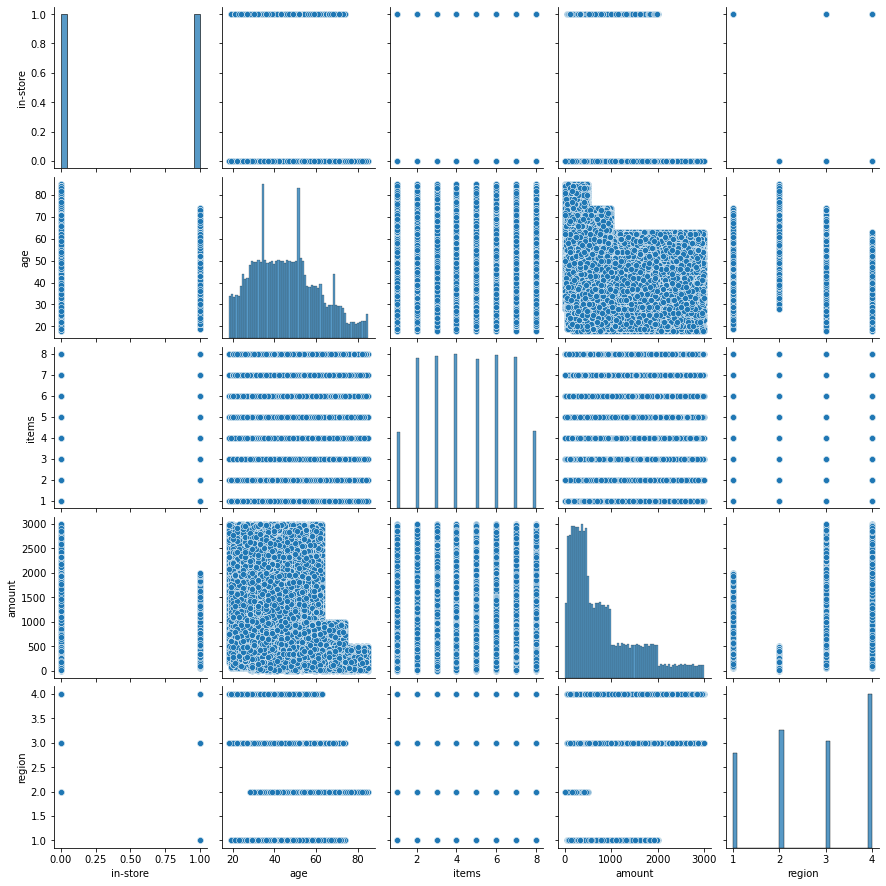

In [9]:
#Pair plot using Seaborn - very useful visualization 
sns.pairplot(data)

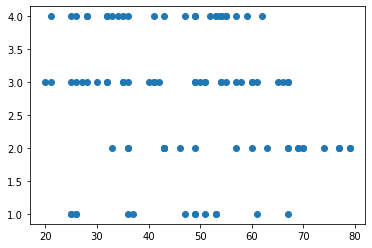

In [10]:
#Scatter plot b/w age and region 
data_sample = data.sample(100)
x = data_sample['age']
y = data_sample['region']
plt.scatter(x,y, marker='o')
plt.show()

## Splitting your data to fit any machine learning model

### Preparing the data
### You will  learn how to separate your data set into features and target variable, and then further split it into test and train parts. And all of this just with few lines of code, elegant and simple.

In [11]:
A_data = data[['in-store', 'age', 'amount']]
B_data = data['region']

In [12]:
A_data

,in-store,age,amount
0,0,37,281.03
1,0,35,219.51
2,1,45,1525.70
3,1,46,715.25
4,1,33,1937.50
...,...,...,...
79995,1,71,558.82
79996,0,59,1932.00
79997,0,54,414.16
79998,1,49,335.32


In [13]:
B_data

0        2
1        2
2        4
3        3
4        1
        ..
79995    1
79996    3
79997    2
79998    1
79999    3
Name: region, Length: 80000, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(A_data, B_data ,test_size = 0.5, shuffle=False)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(40000, 3) (40000, 3) (40000,) (40000,)


In [15]:
#Using Support Vector Classifier
clf = svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [16]:
clf.score(x_test, y_test)

0.53505

In [17]:
clf.predict(x_test[10:15])

array([2, 4, 2, 2, 4])

In [18]:
y_test[10:15]

40010    2
40011    1
40012    2
40013    1
40014    3
Name: region, dtype: int64

In [19]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = linear_regression_model.predict(x_test)

In [21]:
print(y_pred)

[3.1914954  2.6683103  3.77516479 ... 2.50157169 2.2221574  2.54994784]


## Intro to Sci-kit learn 
### Data Structure

In [22]:
#sklearn.datasets.load_digits(*, n_class=10, return_X_y=False, as_frame=False)[source]¶ 
#Load and return the digits dataset (classification).
#Each datapoint is a 8x8 image of a digit.

digits = load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [23]:
print(digits.data.shape)

(1797, 64)


In [24]:
plt.gray() 

<Figure size 432x288 with 0 Axes>

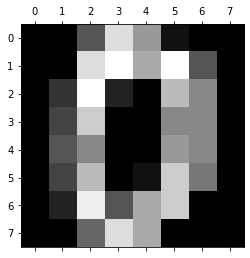

In [25]:
plt.matshow(digits.images[0]) 

In [26]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## Selecting Data 

In [27]:
#select data in Python by using indices
data.iloc[:,3]

0         281.03
1         219.51
2        1525.70
3         715.25
4        1937.50
          ...   
79995     558.82
79996    1932.00
79997     414.16
79998     335.32
79999     527.12
Name: amount, Length: 80000, dtype: float64

### Slicing 

In [28]:
# select first 3 rows 
#Slicing using the [ ] operator selects a set of rows and/or columns from a Data
data[0:3]

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4


In [29]:
# selecting columns using Pandas
#Why do you think 5 columns were selected instead of just 4 as indicated? 
# Its printing the index also. right? 
A = data.iloc[:,0:4]
print(A)

       in-store  age  items   amount
0             0   37      4   281.03
1             0   35      2   219.51
2             1   45      3  1525.70
3             1   46      3   715.25
4             1   33      4  1937.50
...         ...  ...    ...      ...
79995         1   71      3   558.82
79996         0   59      7  1932.00
79997         0   54      1   414.16
79998         1   49      4   335.32
79999         1   30      1   527.12

[80000 rows x 4 columns]


### Prediction 

In [30]:
#features
M = data.iloc[:,0:4]
print('Summary of feature sample')
M.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [31]:
#dependent variable
n = data['region']

In [32]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(M, n, test_size = .30, random_state = 123)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(56000, 4) (24000, 4) (56000,) (24000,)


In [33]:
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [34]:
#Predictions
preds = model.predict(X_test)

In [35]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.39      0.39      0.39      4857
           2       0.91      0.90      0.91      5945
           3       0.38      0.38      0.38      5389
           4       0.54      0.53      0.53      7809

    accuracy                           0.56     24000
   macro avg       0.55      0.55      0.55     24000
weighted avg       0.56      0.56      0.56     24000



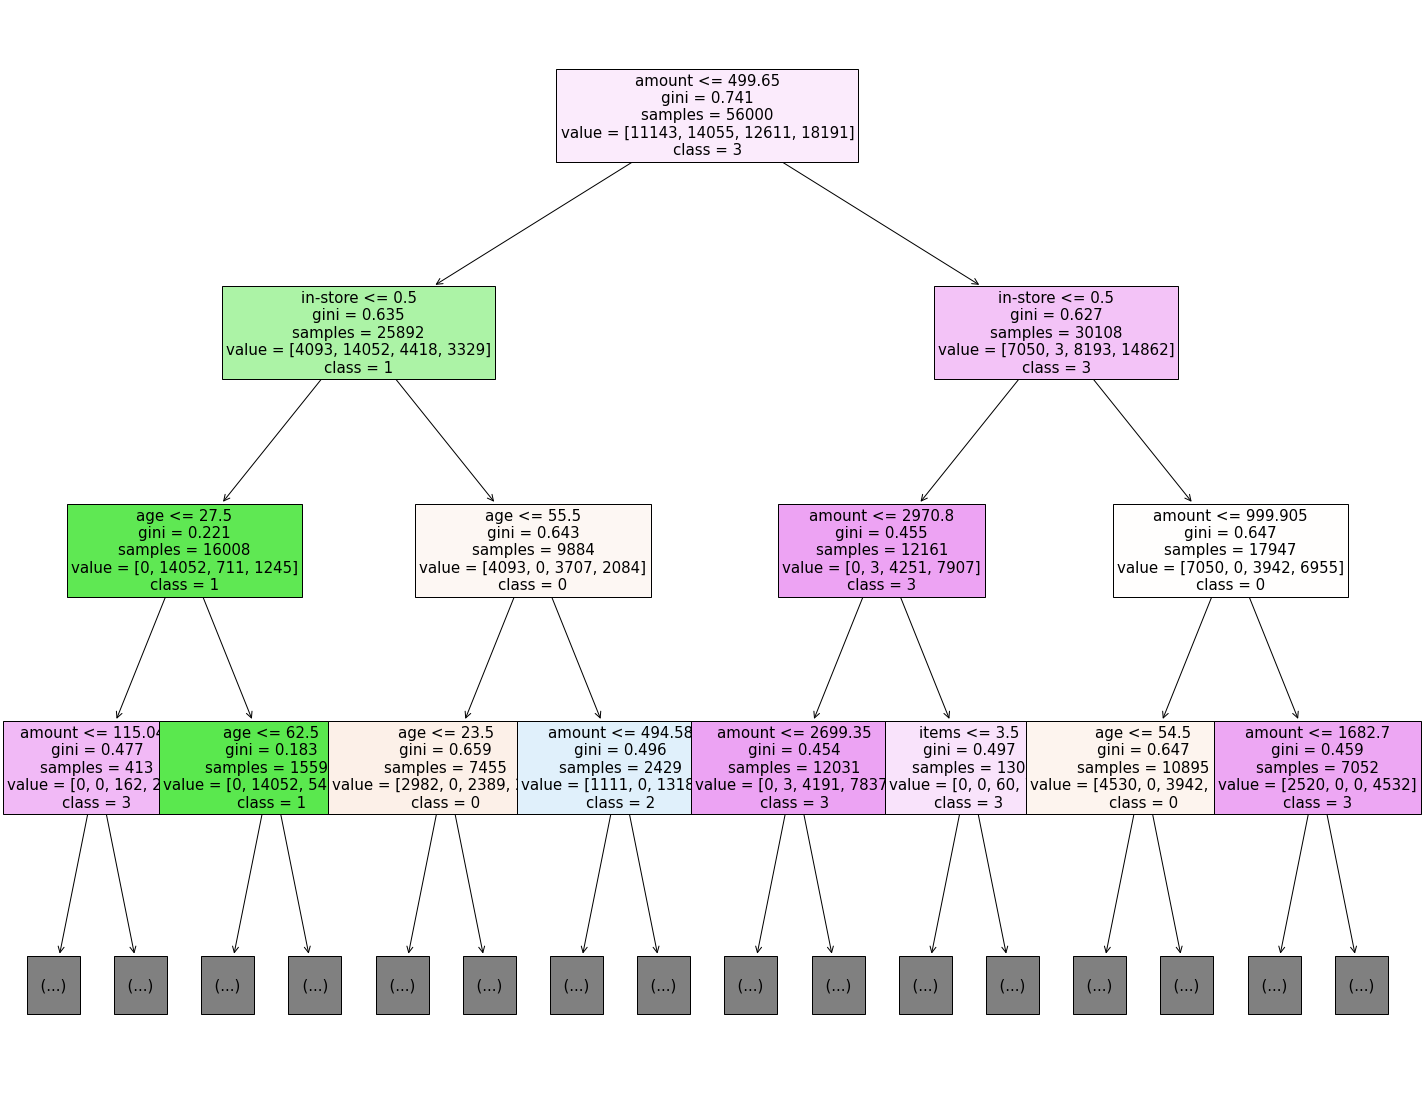

In [36]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model,max_depth=3, feature_names=M.columns,class_names=['0', '1', '2', '3'], filled=True,fontsize=15)

In [37]:
h = export_text(algo)
print(h)

|--- feature_3 <= 499.65
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 27.50
|   |   |   |--- feature_3 <= 115.04
|   |   |   |   |--- feature_2 <= 4.50
|   |   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |   |--- feature_1 <= 22.50
|   |   |   |   |   |   |   |--- feature_1 <= 19.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 104.22
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- feature_3 >  104.22
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_1 >  19.50
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_1 >  22.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_2 >  4.50
|   |   |   |   |   |--- feature_3 <= 110.90
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_3 >  110.90
|   |   |   |   |   |   |--- feature_3 <= 112.9

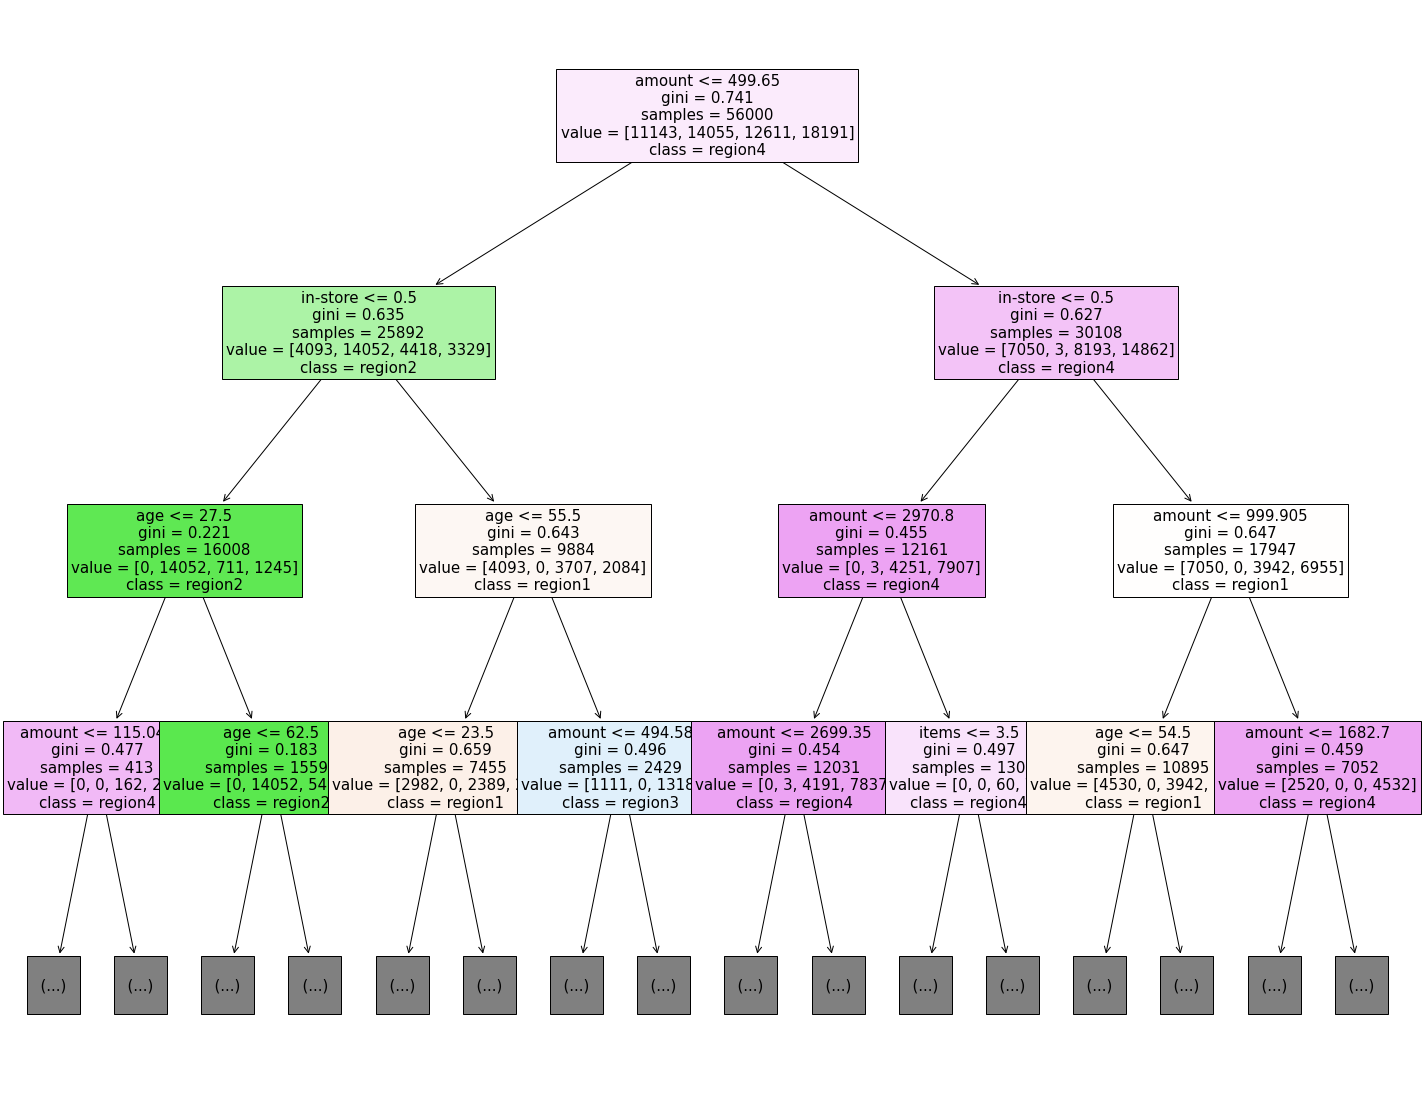

In [38]:
#decision tree for region(dependent variable)
#using gini algorithm 
#inference btween root node and leaf 
#more spend comes from online in region 4 and purchasing less than 3 items 
#age 54 or less spend more than 1000 in in-store from region 1
#age between 26-62 from region 2 and 4 shop online 
#Age 23- 55 fromregion 1 and 3 shop in-store 

fig = plt.figure(figsize=(25,20))
tree1 = plot_tree(model,max_depth=3, feature_names=M.columns,class_names=['region1', 'region2', 'region3', 'region4'], filled=True,fontsize=15)




In [39]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(max_depth=2)
model = clf.fit(M,n)

In [40]:
r = export_text(clf)
print(r)

|--- feature_3 <= 499.95
|   |--- feature_0 <= 0.50
|   |   |--- class: 2
|   |--- feature_0 >  0.50
|   |   |--- class: 1
|--- feature_3 >  499.95
|   |--- feature_0 <= 0.50
|   |   |--- class: 4
|   |--- feature_0 >  0.50
|   |   |--- class: 1



In [144]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(X_train,y_train)

h_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, h_pred)) 

Accuracy: 0.580875


## Discretize Age and predicting against region feature 

In [299]:
#Discretization Age
# lesson learnt - do not drop anything :/
# 7 bins
data['Age_grp']= pd.cut(data.age,bins=[18,24,34,44,54,64,85],include_lowest=True,labels=['18-24','24-34','34-44','44-54','54-64','64-85'])

data   

,in-store,age,items,amount,region,Age_grp
0,0,37,4,281.03,2,34-44
1,0,35,2,219.51,2,34-44
2,1,45,3,1525.70,4,44-54
3,1,46,3,715.25,3,44-54
4,1,33,4,1937.50,1,24-34
...,...,...,...,...,...,...
79995,1,71,3,558.82,1,64-85
79996,0,59,7,1932.00,3,54-64
79997,0,54,1,414.16,2,44-54
79998,1,49,4,335.32,1,44-54


In [315]:
#features
J = data.iloc[:,[0,2,4]]
print('Summary of feature sample')
J.head()

Summary of feature sample


,in-store,items,region
0,0,4,2
1,0,2,2
2,1,3,4
3,1,3,3
4,1,4,1


In [316]:
#dependent variable
k = data['Age_grp']

In [317]:
#Train/Test Split
J_train, J_test, k_train, k_test = train_test_split(J, k, test_size = .3, random_state = 123)
print(J_train.shape,J_test.shape,k_train.shape,k_test.shape)

(56000, 3) (24000, 3) (56000,) (24000,)


In [318]:
print(J_train,k_train)

       in-store  items  region
25183         1      4       4
37715         1      3       4
38347         0      5       2
4589          1      4       1
78269         0      3       3
...         ...    ...     ...
63206         0      6       2
61404         0      4       2
17730         1      2       4
28030         0      3       4
15725         0      4       4

[56000 rows x 3 columns] 25183    24-34
37715    34-44
38347    44-54
4589     18-24
78269    34-44
         ...  
63206    64-85
61404    34-44
17730    34-44
28030    18-24
15725    24-34
Name: Age_grp, Length: 56000, dtype: category
Categories (6, object): ['18-24' < '24-34' < '34-44' < '44-54' < '54-64' < '64-85']


In [319]:
#finding NAN in my pd.cut 

is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [in-store, age, items, amount, region, Age_grp]
Index: []


In [320]:
#Modeling (Classification)
agebin = DecisionTreeClassifier()

In [321]:
modelage = agebin.fit(J_train,k_train)

In [322]:
#Predictions
preds_age = modelage.predict(J_test)

In [323]:
#This means that there is no F-score to calculate for this label, 
#and thus the F-score for this case is considered to be 0.0. 
#Since you requested an average of the score, you must take into account that a score of 0 was
#included in the calculation, and this is why scikit-learn is showing you that warning.
print(classification_report(k_test, preds_age))


/Users/sugisuri/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       18-24       0.00      0.00      0.00      1796
       24-34       0.24      0.26      0.25      4950
       34-44       0.24      0.23      0.24      5358
       44-54       0.23      0.32      0.27      5227
       54-64       0.23      0.02      0.03      3419
       64-85       0.35      0.65      0.46      3250

    accuracy                           0.27     24000
   macro avg       0.22      0.25      0.21     24000
weighted avg       0.23      0.27      0.23     24000



In [324]:
h = export_text(agebin)
print(h)

|--- feature_2 <= 3.50
|   |--- feature_2 <= 1.50
|   |   |--- feature_1 <= 4.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- class: 34-44
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- class: 34-44
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_1 <= 3.50
|   |   |   |   |   |   |--- class: 34-44
|   |   |   |   |   |--- feature_1 >  3.50
|   |   |   |   |   |   |--- class: 34-44
|   |   |--- feature_1 >  4.50
|   |   |   |--- feature_1 <= 7.50
|   |   |   |   |--- feature_1 <= 5.50
|   |   |   |   |   |--- class: 24-34
|   |   |   |   |--- feature_1 >  5.50
|   |   |   |   |   |--- feature_1 <= 6.50
|   |   |   |   |   |   |--- class: 44-54
|   |   |   |   |   |--- feature_1 >  6.50
|   |   |   |   |   |   |--- class: 44-54
|   |   |   |--- feature_1 >  7.50
|   |   |   |   |--- class: 24-34
|   |--- feature_2 >  1.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_1 <= 5.50
|   |   |   |  

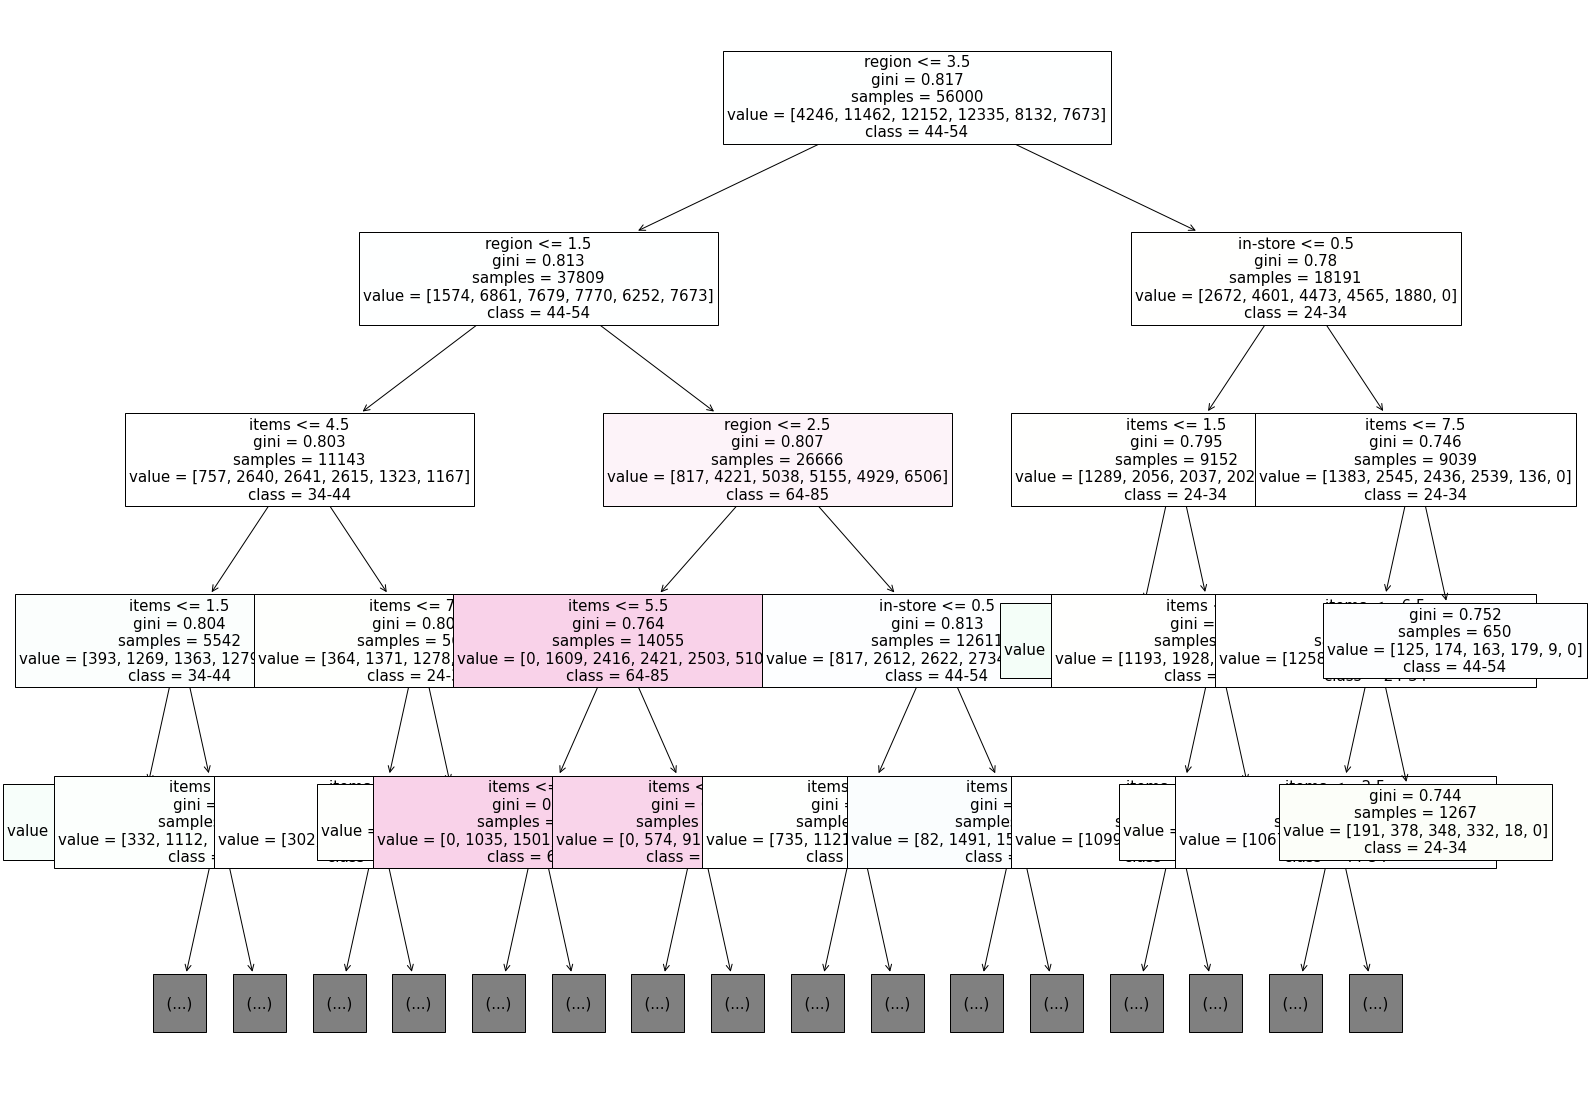

In [325]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(modelage,max_depth=4, feature_names=J.columns,
                 class_names=['18-24' ,'24-34','34-44','44-54','54-64','64-85'],filled=True,fontsize=15)



In [326]:
accuracy_score(k_test,preds_age)

0.26516666666666666

In [236]:
score = agebin.score(J_test, k_test)
print(score)

0.2655


## Random Forest Classifer

In [215]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(J_train,k_train)

y_pred=clf.predict(J_test)

print("Accuracy:",metrics.accuracy_score(k_test, y_pred)) 

Accuracy: 0.2649375


## GradientBoosting Classifier

In [190]:
clf1 = GradientBoostingClassifier(random_state=0)
clf1.fit(J_train, k_train)
clf.predict(J_test[:4])
clf.score(J_test, k_test)

0.21541666666666667

## Discritize Amount

In [284]:
data['Amount_cut']= pd.cut(data.amount,bins=[0,500,1000,1500,2000,2500,3000],include_lowest=True,
                           labels=['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000'])

data

,in-store,age,items,amount,region,Amount_cut
0,0,37,4,281.03,2,0-500
1,0,35,2,219.51,2,0-500
2,1,45,3,1525.70,4,1500-2000
3,1,46,3,715.25,3,500-1000
4,1,33,4,1937.50,1,1500-2000
...,...,...,...,...,...,...
79995,1,71,3,558.82,1,500-1000
79996,0,59,7,1932.00,3,1500-2000
79997,0,54,1,414.16,2,0-500
79998,1,49,4,335.32,1,0-500


In [285]:
#features
S = data.iloc[:,[4]]
print('Summary of feature sample')
S.head()

Summary of feature sample


,region
0,2
1,2
2,4
3,3
4,1


In [286]:
#dependent variable
t = data['Amount_cut']

In [287]:
#Train/Test Split
S_train, S_test, t_train, t_test = train_test_split(S, t, test_size = .25, random_state = 123)
print(S_train.shape,S_test.shape,t_train.shape,t_test.shape)

(60000, 1) (20000, 1) (60000,) (20000,)


In [288]:
print(S_train,t_train)

       region
62061       3
58108       3
41829       1
31387       4
78384       2
...       ...
63206       2
61404       2
17730       4
28030       4
15725       4

[60000 rows x 1 columns] 62061    2500-3000
58108    1500-2000
41829        0-500
31387     500-1000
78384        0-500
           ...    
63206        0-500
61404        0-500
17730    1500-2000
28030    2000-2500
15725     500-1000
Name: Amount_cut, Length: 60000, dtype: category
Categories (6, object): ['0-500' < '500-1000' < '1000-1500' < '1500-2000' < '2000-2500' < '2500-3000']


In [289]:
#finding NAN in my pd.cut 

is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [in-store, age, items, amount, region, Amount_cut]
Index: []


In [290]:
#Modeling (Classification)
amountbin = DecisionTreeClassifier()

In [291]:
modelamount = amountbin.fit(S_train,t_train)

In [292]:
#Predictions
preds_amount = modelamount.predict(S_test)

In [293]:
print(classification_report(t_test, preds_amount))

/Users/sugisuri/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       0-500       1.00      0.54      0.70      9068
   1000-1500       0.00      0.00      0.00      2186
   1500-2000       0.00      0.00      0.00      2167
   2000-2500       0.00      0.00      0.00       839
   2500-3000       0.00      0.00      0.00       876
    500-1000       0.32      1.00      0.49      4864

    accuracy                           0.49     20000
   macro avg       0.22      0.26      0.20     20000
weighted avg       0.53      0.49      0.44     20000



In [294]:
d = export_text(amountbin)
print(d)

|--- feature_0 <= 2.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 500-1000
|   |--- feature_0 >  1.50
|   |   |--- class: 0-500
|--- feature_0 >  2.50
|   |--- feature_0 <= 3.50
|   |   |--- class: 500-1000
|   |--- feature_0 >  3.50
|   |   |--- class: 500-1000



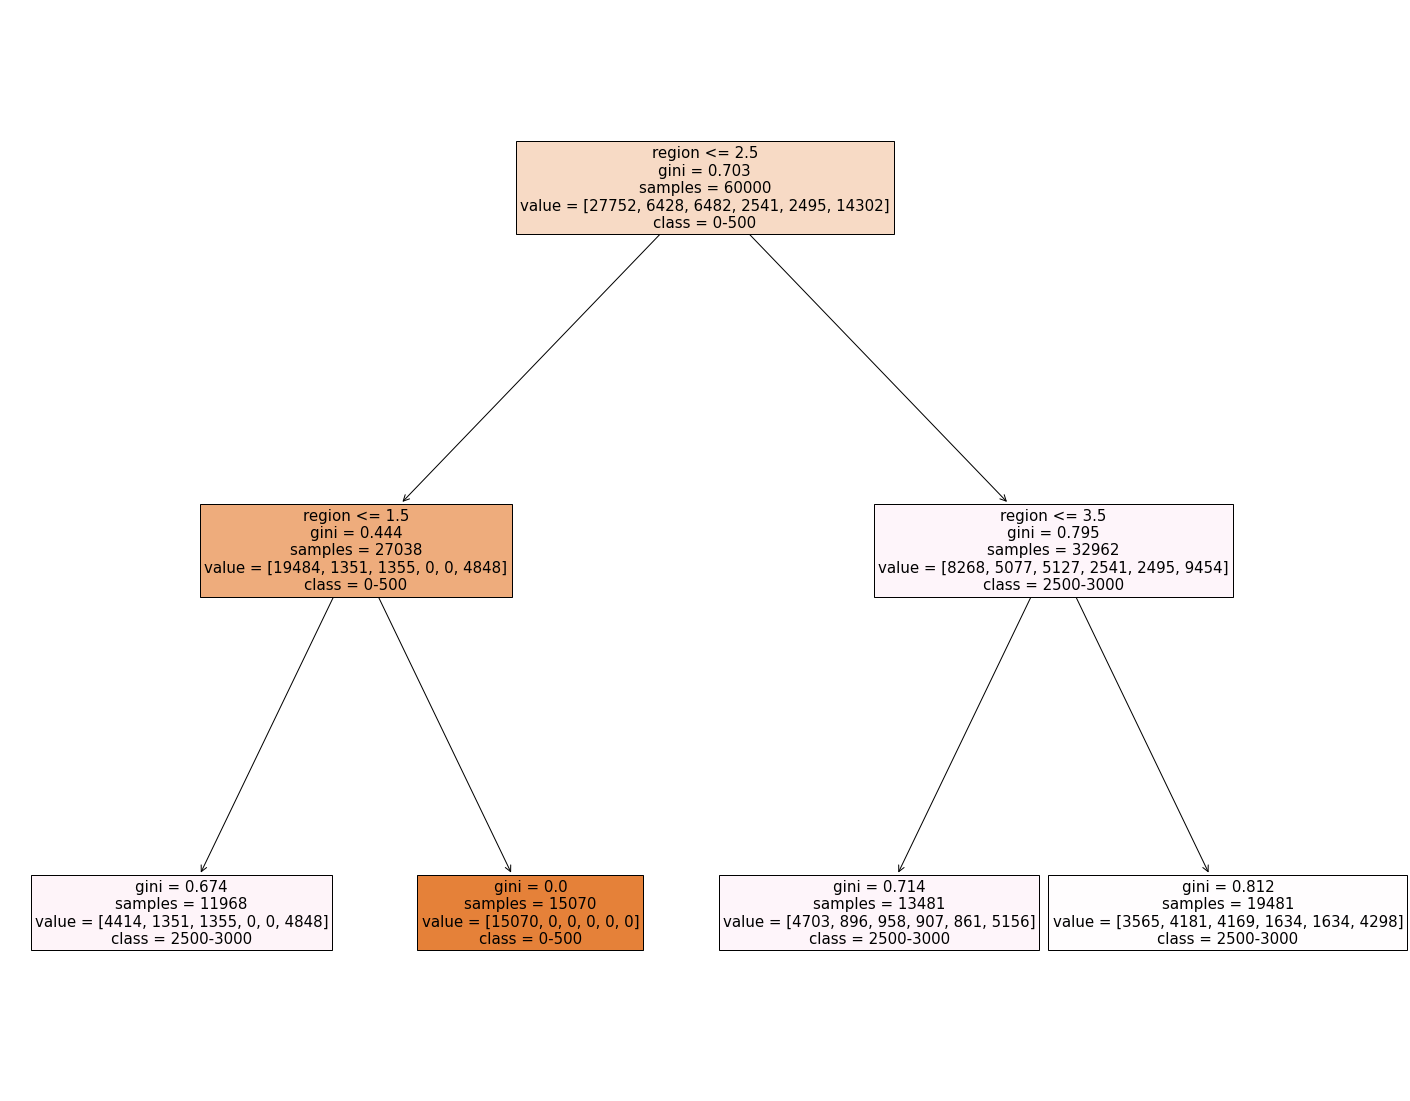

In [295]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(modelamount,max_depth=6, feature_names=S.columns,
                 class_names=['0-500' , '500-1000' ,'1000-1500' , '1500-2000' , '2000-2500', '2500-3000'],
                 filled=True,fontsize=15)


In [296]:
clf_amount=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf_amount.fit(S_train,t_train)

b_pred=clf_amount.predict(S_test)

print("Accuracy:",metrics.accuracy_score(t_test, b_pred)) 

Accuracy: 0.4897
